In [1]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns, pandas as pd

In [10]:
x_coords = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5]
y_coords = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1]

In [11]:
df = pd.DataFrame({"x_coord" : x_coords, "y_coord": y_coords})
df.head()

,x_coord,y_coord
0,80.1,87.2
1,93.1,96.1
2,86.6,95.6
3,98.5,92.4
4,86.4,92.4


In [12]:
Z = linkage(df, "ward")
df["cluster_labels"] = fcluster(Z, 3, criterion="maxclust")
df.head(3)

,x_coord,y_coord,cluster_labels
0,80.1,87.2,1
1,93.1,96.1,1
2,86.6,95.6,1


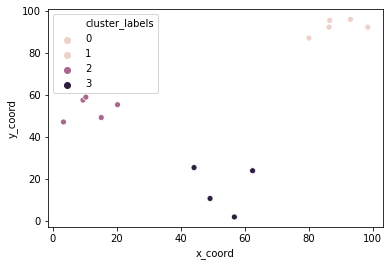

In [13]:
sns.scatterplot(x="x_coord", y="y_coord", hue="cluster_labels", data=df)
plt.show()

### K-means clustering in SciPy

#### two steps of k-means clustering:

* Define cluster centers through kmeans() function. 
  * It has two required arguments: observations and number of clusters.
* Assign cluster labels through the vq() function.
  * It has two required arguments: observations and cluster centers.

In [16]:
from scipy.cluster.vq import kmeans, vq
import random

In [ ]:
# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[["x_scaled","y_scaled"]], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[["x_scaled","y_scaled"]], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [17]:
random.seed((1000,2000))

In [18]:
centroids, _ = kmeans(df, 3)
df["cluster_labels_kmeans"], _ = vq(df, centroids)

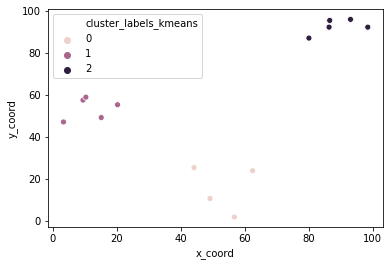

In [19]:
sns.scatterplot(x="x_coord", y="y_coord", hue="cluster_labels_kmeans", data=df)
plt.show()

### Normalization of Data

In [21]:
# Process of rescaling data to a standard deviation of 1
# x_new = x / std(x)
from scipy.cluster.vq import whiten

In [22]:
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]

In [25]:
scaled_data = whiten(data)
scaled_data

array([2.72733941, 0.54546788, 1.63640365, 1.63640365, 1.09093577,
       1.63640365, 1.63640365, 4.36374306, 0.54546788, 1.09093577,
       1.09093577, 1.63640365, 2.72733941])

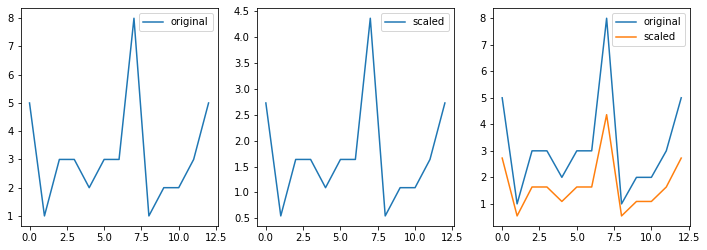

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(data, label="original")
plt.legend()
plt.subplot(132)
plt.plot(scaled_data, label="scaled")
plt.legend()
plt.subplot(133)
plt.plot(data, label="original")
plt.plot(scaled_data, label="scaled")
plt.legend()
plt.show()

### Normalization of small numbers

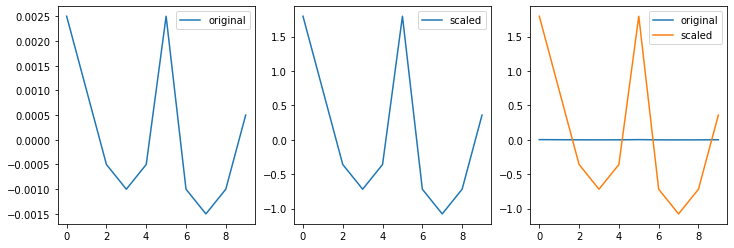

In [36]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_rate_cuts = whiten(rate_cuts)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(rate_cuts, label="original")
plt.legend()
plt.subplot(132)
plt.plot(scaled_rate_cuts, label="scaled")
plt.legend()
plt.subplot(133)
plt.plot(rate_cuts, label='original')
plt.plot(scaled_rate_cuts, label='scaled')
plt.legend()
plt.show()

#### Hierarchical clustering: ward method

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = "ward", metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

#### Hierarchical clustering: single method

In [ ]:
# Use the linkage() function
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method = "single", metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

#### Hierarchical clustering: complete method

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], method = "complete", metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Visualizing Data

In [ ]:
# Import the pyplot class
import matplotlib.pyplot as plt 

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x="x_scaled", 
                	   y="y_scaled",
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

In [ ]:
# Import the seaborn module
import seaborn as sns 

# Plot a scatter plot using seaborn
sns.scatterplot(x="x_scaled", 
                y="y_scaled", 
                hue="cluster_labels", 
                data = comic_con)
plt.show()

### Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram
Z = linkage(df[['x_whiten', 'y_whiten']], method='ward', metric='euclidean')
dn = dendrogram(Z)
plt.show()

In [49]:
### timing using %timeit
%timeit sum([1,3,5])

190 ns ± 2.49 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Finding optimum "k" Elbow Method

In [ ]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[["x_scaled","y_scaled"]], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot_data)
plt.xticks(num_clusters)
plt.show()

### Elbow method on uniform data

In [ ]:
# Let us now see how the elbow plot looks on a data set with uniformly distributed points. 
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[["x_scaled","y_scaled"]], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Impact of seeds on distinct clusters

Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

### Dominant Colors in Images

#### Extracting RGB values from image
There are broadly three steps to find the dominant colors in an image:

* Extract RGB values into three lists.
* Perform k-means clustering on scaled RGB values.
* Display the colors of cluster centers.

To extract RGB values, we use the imread() function of the image class of matplotlib.

In [58]:
# Import image class of matplotlib
import matplotlib.image as img
from matplotlib.pyplot import imshow

# Read batman image and print dimensions
sea_horizon = img.imread("../00_DataSets/img/sea_horizon.jpg")
print(sea_horizon.shape)

(3648, 5472, 3)


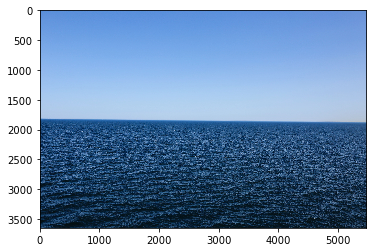

In [59]:
imshow(sea_horizon)

In [60]:
# Store RGB values of all pixels in lists r, g and b
r, g, b = [], [], []
for row in sea_horizon:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [61]:
sea_horizon_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
sea_horizon_df.head()

,red,blue,green
0,84,217,140
1,84,217,140
2,84,217,140
3,84,217,140
4,85,216,138


In [62]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(sea_horizon_df[["red", "blue", "green"]], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot_data = pd.DataFrame({"num_clusters":num_clusters, "distortions":distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot_data)
plt.xticks(num_clusters)
plt.show()

TypeError: type other than float or double not supported

In [63]:
# scaling the data
sea_horizon_df["scaled_red"] = whiten(sea_horizon_df["red"])
sea_horizon_df["scaled_blue"] = whiten(sea_horizon_df["blue"])
sea_horizon_df["scaled_green"] = whiten(sea_horizon_df["green"])

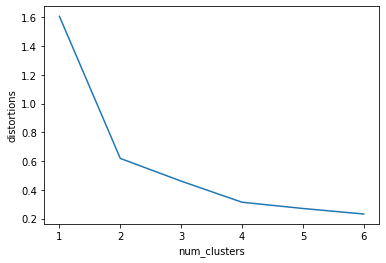

In [64]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(sea_horizon_df[["scaled_red", "scaled_blue", "scaled_green"]], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot_data = pd.DataFrame({"num_clusters":num_clusters, "distortions":distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot_data)
plt.xticks(num_clusters)
plt.show()

#### Show Dominant colors

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: converted_pixel = standardized_pixel * pixel_std / 255

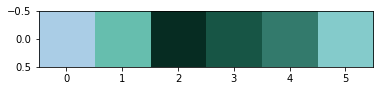

In [66]:
# Get standard deviations of each color
r_std, g_std, b_std = sea_horizon_df[['red', 'green', 'blue']].std()
colors = []
for cluster_center in cluster_centers:
    scaled_red, scaled_green, scaled_blue = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_red * r_std / 255,
        scaled_green * g_std / 255,
        scaled_blue * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

### Document clustering

In [67]:
# TF-IDF of movie plots

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, min_df=0.1, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

In [ ]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])